## **Day 1: Regression – Predicting Crypto Prices**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import ccxt
import time
import seaborn as sns
import matplotlib.pyplot as plt
import ta

### *1. Data Collection with ccxt :*

In [146]:
print(ccxt.exchanges)

['alpaca', 'apex', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bingx', 'bit2c', 'bitbank', 'bitbns', 'bitfinex', 'bitflyer', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitrue', 'bitso', 'bitstamp', 'bitteam', 'bittrade', 'bitvavo', 'blockchaincom', 'blofin', 'btcalpha', 'btcbox', 'btcmarkets', 'btcturk', 'bybit', 'cex', 'coinbase', 'coinbaseadvanced', 'coinbaseexchange', 'coinbaseinternational', 'coincatch', 'coincheck', 'coinex', 'coinmate', 'coinmetro', 'coinone', 'coinsph', 'coinspot', 'cryptocom', 'cryptomus', 'defx', 'delta', 'deribit', 'derive', 'digifinex', 'ellipx', 'exmo', 'fmfwio', 'gate', 'gateio', 'gemini', 'hashkey', 'hitbtc', 'hollaex', 'htx', 'huobi', 'hyperliquid', 'independentreserve', 'indodax', 'kraken', 'krakenfutures', 'kucoin', 'kucoinfutures', 'latoken', 'lbank', 'luno', 'mercado', 'mexc', 'modetrade', 'myokx', 'ndax', 'novadax', 'oceanex', 'okcoin', 'okx', 'okxus', 'onetrading', 'oxfun', 'p2b', 'paradex', '

In [162]:
crypto = ccxt.binanceus().load_markets().keys()
crypto

dict_keys(['BTC/USD4', 'ETH/USD4', 'XRP/USD4', 'BCH/USD4', 'LTC/USD4', 'USDT/USD4', 'BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'BCH/USDT', 'LTC/USDT', 'BNB/USD4', 'BNB/USDT', 'ETH/BTC', 'XRP/BTC', 'BNB/BTC', 'LTC/BTC', 'BCH/BTC', 'ADA/USD4', 'BAT/USD4', 'ETC/USD4', 'XLM/USD4', 'ZRX/USD4', 'ADA/USDT', 'BAT/USDT', 'ETC/USDT', 'XLM/USDT', 'ZRX/USDT', 'LINK/USD4', 'RVN/USD4', 'DASH/USD4', 'ZEC/USD4', 'ALGO/USD4', 'IOTA/USD4', 'BUSD/USD4', 'BTC/BUSD', 'DOGE/USDT', 'WAVES/USD4', 'ATOM/USDT', 'ATOM/USD4', 'NEO/USDT', 'NEO/USD4', 'VET/USDT', 'QTUM/USDT', 'QTUM/USD4', 'NANO/USD4', 'ICX/USD4', 'ENJ/USD4', 'ONT/USD4', 'ONT/USDT', 'ZIL/USD4', 'ZIL/BUSD', 'VET/USD4', 'BNB/BUSD', 'XRP/BUSD', 'ETH/BUSD', 'ALGO/BUSD', 'XTZ/USD4', 'XTZ/BUSD', 'HBAR/USD4', 'HBAR/BUSD', 'OMG/USD4', 'OMG/BUSD', 'MATIC/USD4', 'MATIC/BUSD', 'XTZ/BTC', 'ADA/BTC', 'REP/BUSD', 'REP/USD4', 'EOS/BUSD', 'EOS/USD4', 'DOGE/USD4', 'KNC/USD4', 'KNC/USDT', 'VTHO/USDT', 'VTHO/USD4', 'USDC/USD4', 'COMP/USDT', 'COMP/USD4', 'MANA/USD4', 'HNT/USD

In [163]:
len(crypto)

586

In [164]:
ccxt.binanceus().fetch_ticker('BTC/USDT').keys()

dict_keys(['symbol', 'timestamp', 'datetime', 'high', 'low', 'bid', 'bidVolume', 'ask', 'askVolume', 'vwap', 'open', 'close', 'last', 'previousClose', 'change', 'percentage', 'average', 'baseVolume', 'quoteVolume', 'markPrice', 'indexPrice', 'info'])

In [167]:
ccxt.binanceus().fetch_ticker('BTC/USDT')

{'symbol': 'BTC/USDT',
 'timestamp': 1752571019530,
 'datetime': '2025-07-15T09:16:59.530Z',
 'high': 122245.61,
 'low': 116340.31,
 'bid': 117074.84,
 'bidVolume': 0.31721,
 'ask': 117153.32,
 'askVolume': 0.00098,
 'vwap': 119437.9131373,
 'open': 122241.4,
 'close': 117200.82,
 'last': 117200.82,
 'previousClose': 122260.05,
 'change': -5040.58,
 'percentage': -4.123,
 'average': 119721.11,
 'baseVolume': 15.19694,
 'quoteVolume': 1815090.7996728,
 'markPrice': None,
 'indexPrice': None,
 'info': {'symbol': 'BTCUSDT',
  'priceChange': '-5040.58000000',
  'priceChangePercent': '-4.123',
  'weightedAvgPrice': '119437.91313730',
  'prevClosePrice': '122260.05000000',
  'lastPrice': '117200.82000000',
  'lastQty': '0.00009000',
  'bidPrice': '117074.84000000',
  'bidQty': '0.31721000',
  'askPrice': '117153.32000000',
  'askQty': '0.00098000',
  'openPrice': '122241.40000000',
  'highPrice': '122245.61000000',
  'lowPrice': '116340.31000000',
  'volume': '15.19694000',
  'quoteVolume': 

In [168]:
ccxt.binanceus().fetch_ohlcv('BTC/USDT')[:5]

[[1752541140000, 119461.91, 119461.93, 119461.91, 119461.93, 0.00107],
 [1752541200000, 119564.41, 119564.41, 119551.6, 119551.6, 0.00179],
 [1752541260000, 119506.79, 119506.79, 119460.1, 119460.1, 0.07427],
 [1752541320000, 119373.57, 119373.57, 119373.57, 119373.57, 8e-05],
 [1752541380000, 119361.89, 119361.89, 119330.86, 119330.86, 0.00191]]

In [237]:
stock = ccxt.woo()

In [238]:
crypto = stock.load_markets().keys()
crypto

dict_keys(['ETHW/USDT', 'POPCAT/USDT', 'SAND/USDT', 'PAXG/USDT', 'ACE/USDT', 'ETH/BTC', 'BONK/USDT', 'PUFF/USDT', 'CHILLGUY/USDT', 'XLM/USDT', 'YGG/USDT', 'NUTS/USDT', 'DOT/USDT', 'USDC/USDT', 'PIPPIN/USDT', 'HBAR/USDT', 'DOGE/USDT', 'ADA/USDT', 'STRK/USDT', 'GMT/USDT', 'TON/USDT', 'ME/USDT', 'TRX/USDT', 'LTC/USDT', 'MAVIA/USDT', 'ZRO/USDT', 'UNI/USDT', 'GOAT/USDT', 'PYTH/USDT', 'ATOM/USDT', 'BLUR/USDT', 'ENA/USDT', 'MANTA/USDT', 'JTO/USDT', 'MAGIC/USDT', 'PNUT/USDT', 'USDF/USDT', 'PENGU/USDT', 'ETC/USDT', 'ZK/USDT', 'WIF/USDT', 'ICP/USDT', 'ONDO/USDT', 'CELO/USDT', 'HMSTR/USDT', 'CRV/USDT', 'TIA/USDT', 'SUI/USDT', 'SNX/USDT', 'C98/USDT', 'NPC/USDT', 'ONE/USDT', 'KSM/USDT', 'VET/USDT', 'ENS/USDT', 'GALA/USDT', 'BRETT/USDT', 'TRUMP/USDT', 'METIS/USDT', 'FOXY/USDT', 'SAHARA/USDT', 'PONKE/USDT', 'BOME/USDT', 'FXS/USDT', 'NEAR/USDT', 'PROPC/USDT', 'F/USDT', 'GRT/USDT', 'XRP/USDT', 'SUSHI/USDT', 'APE/USDT', 'IMX/USDT', 'RENDER/USDT', 'W/USDT', 'ETHFI/USDT', 'SPK/USDT', 'KUB/USDT', 'INJ/USDT

In [239]:
symbol = 'BTC/USDT'
timeframe = '1d'
data = []

In [240]:
start_date = '2017-01-01T00:00:00Z'
end_date = '2025-12-31T23:59:59Z'
since = stock.parse8601(start_date)
end_timestamp = stock.parse8601(end_date)

In [241]:
while since < end_timestamp:
    ohlcv = stock.fetch_ohlcv(symbol, timeframe = timeframe, since = since, limit = 5000)
 
    if not ohlcv:
        break
 
    data.extend(ohlcv)
 
    last_timestamp = ohlcv[-1][0]
    since = last_timestamp + 1
 
    time.sleep(stock.rateLimit / 1000)
 
    if last_timestamp >= end_timestamp:
        break

In [242]:
len(data)

2844

In [243]:
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,timestamp,open,high,low,close,volume
0,2017-10-01,4378.49,4406.52,4240.04,4378.48,726.963685
1,2017-10-02,4400.00,4561.63,4360.00,4380.00,655.756974
2,2017-10-03,4380.00,4467.33,4180.80,4310.00,1082.323563
3,2017-10-04,4310.00,4373.00,4142.00,4208.59,868.465101
4,2017-10-05,4208.59,4355.00,4110.00,4292.43,779.138638
...,...,...,...,...,...,...
2839,2025-07-11,116004.58,118842.56,115218.77,117520.28,3110.922036
2840,2025-07-12,117525.07,118201.67,116920.15,117389.09,1914.058989
2841,2025-07-13,117425.06,119482.23,117221.37,119047.16,1386.361686
2842,2025-07-14,119076.50,123199.44,118905.17,119853.11,4025.973993


In [2]:
# df.to_csv('woo-BTC USDT.csv',index=False)

In [2]:
df = pd.read_csv(r'woo-BTC USDT.csv')
df.shape

(2844, 6)

### *2. Data Preprocessing :*

In [22]:
df = pd.read_csv(r'woo-BTC USDT.csv')
df.shape

(2844, 6)

In [23]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-10-01,4378.49,4406.52,4240.04,4378.48,726.963685
1,2017-10-02,4400.00,4561.63,4360.00,4380.00,655.756974
2,2017-10-03,4380.00,4467.33,4180.80,4310.00,1082.323563
3,2017-10-04,4310.00,4373.00,4142.00,4208.59,868.465101
4,2017-10-05,4208.59,4355.00,4110.00,4292.43,779.138638


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2844 non-null   object 
 1   open       2844 non-null   float64
 2   high       2844 non-null   float64
 3   low        2844 non-null   float64
 4   close      2844 non-null   float64
 5   volume     2844 non-null   float64
dtypes: float64(5), object(1)
memory usage: 133.4+ KB


In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2844 non-null   datetime64[ns]
 1   open       2844 non-null   float64       
 2   high       2844 non-null   float64       
 3   low        2844 non-null   float64       
 4   close      2844 non-null   float64       
 5   volume     2844 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 133.4 KB


In [27]:
df['year'] = df['timestamp'].dt.year

In [28]:
df['day'] = df['timestamp'].dt.day_name()

In [29]:
df.groupby('year')['open'].count()

year
2017     92
2018    364
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025    196
Name: open, dtype: int64

In [30]:
df.groupby('day')['open'].count()

day
Friday       405
Monday       407
Saturday     406
Sunday       407
Thursday     406
Tuesday      407
Wednesday    406
Name: open, dtype: int64

In [31]:
df = df[df['timestamp'].dt.year != 2017]

In [32]:
df = df.set_index('timestamp')

In [33]:
df.head()

,open,high,low,close,volume,year,day
timestamp,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018,Monday
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018,Tuesday
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018,Wednesday
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018,Thursday
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018,Friday


In [34]:
df.tail()

,open,high,low,close,volume,year,day
timestamp,,,,,,,
2025-07-11,116004.58,118842.56,115218.77,117520.28,3110.922036,2025,Friday
2025-07-12,117525.07,118201.67,116920.15,117389.09,1914.058989,2025,Saturday
2025-07-13,117425.06,119482.23,117221.37,119047.16,1386.361686,2025,Sunday
2025-07-14,119076.50,123199.44,118905.17,119853.11,4025.973993,2025,Monday
2025-07-15,119825.81,119943.14,115724.30,117535.22,4045.322510,2025,Tuesday


In [35]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
year      0
day       0
dtype: int64

In [36]:
df.duplicated().value_counts()

False    2752
Name: count, dtype: int64

In [37]:
df.describe()

,open,high,low,close,volume,year
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,32968.437300,33711.147598,32182.619052,33005.877060,54442.360346,2021.286701
std,27872.577002,28403.346372,27338.848300,27916.447772,75691.282868,2.184742
min,3211.710000,3276.500000,3156.260000,3211.720000,291.052909,2018.000000
25%,9249.070000,9435.167500,9060.000000,9249.077500,16708.410116,2019.000000
50%,25840.255000,26139.000000,25341.000000,25841.025000,34900.592623,2021.000000
75%,48776.057500,49720.695000,47021.675000,48816.190000,57862.575188,2023.000000
max,119825.810000,123199.440000,118905.170000,119853.110000,710666.322917,2025.000000


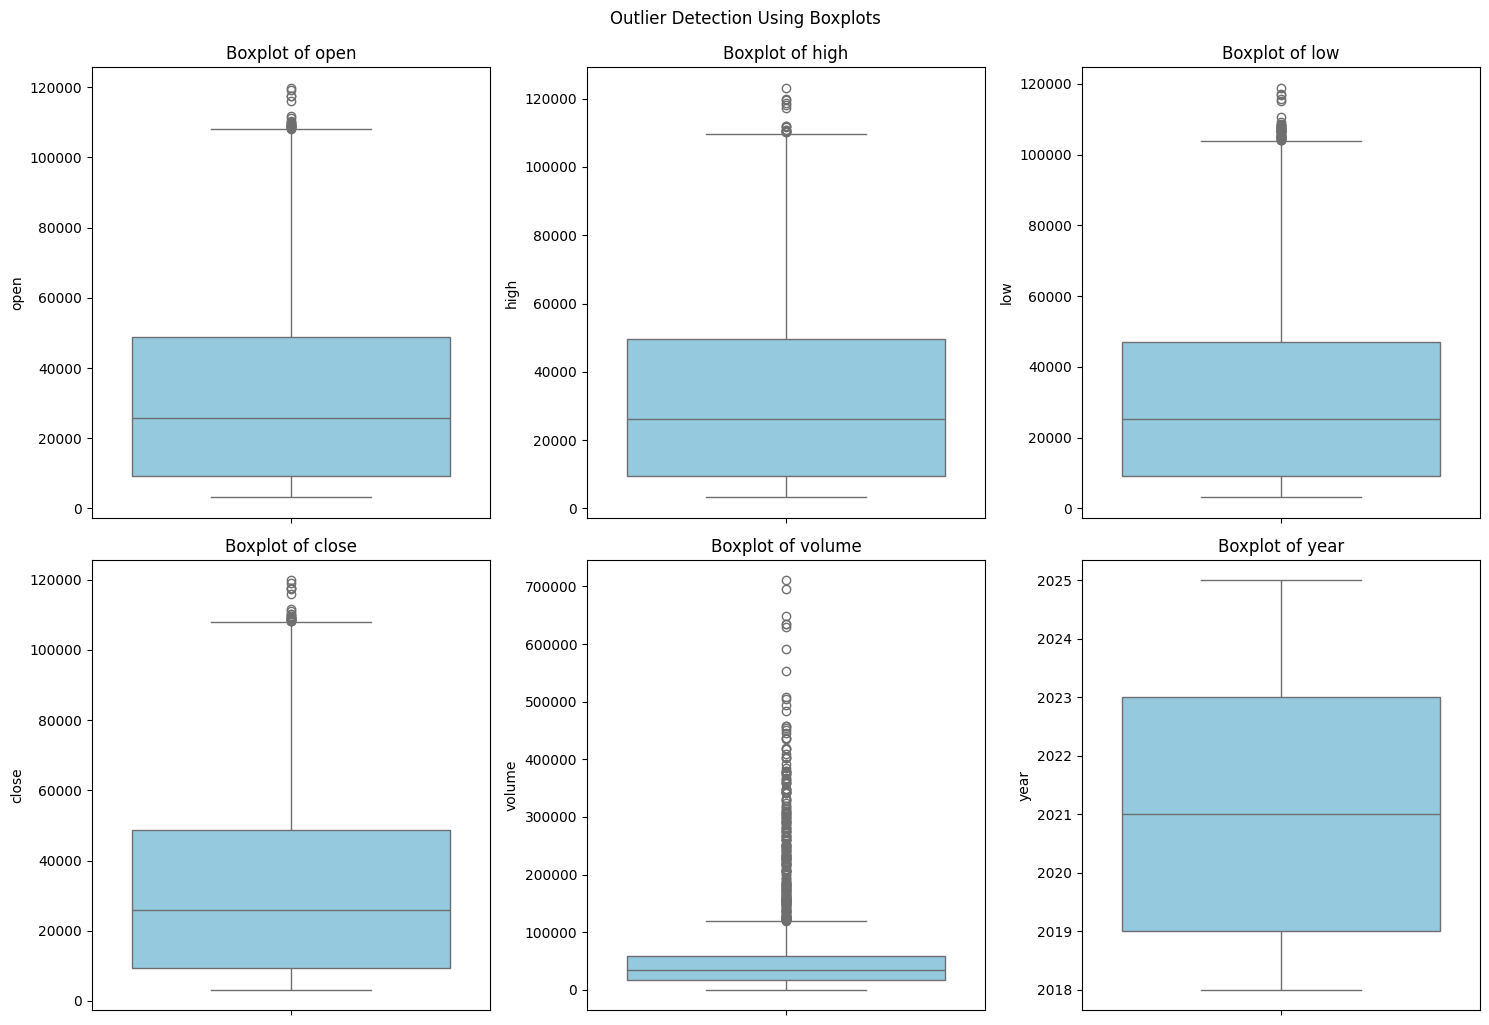

In [38]:
cols = ['open', 'high', 'low', 'close', 'volume', 'year']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Outlier Detection Using Boxplots',y = 1.02)
plt.show()


In [39]:
df['returns'] = df['close'].pct_change().round(2)

In [40]:
df.head()

,open,high,low,close,volume,year,day,returns
timestamp,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018,Monday,NaN
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018,Tuesday,0.10
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018,Wednesday,0.02
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018,Thursday,0.01
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018,Friday,0.13


In [41]:
# df = df.fillna(0)

### *3. Feature Engineering :*

In [42]:
df['target'] = df['close'].shift(-1)
# because i am trying to predict tomorrow’s close using today’s features.

In [43]:
df.head()

,open,high,low,close,volume,year,day,returns,target
timestamp,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018,Monday,NaN,14675.11
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018,Tuesday,0.10,14919.51
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018,Wednesday,0.02,15059.54
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018,Thursday,0.01,16960.39
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018,Friday,0.13,17069.79


#### *SMA [window - 7] :*

In [44]:
# df['sma'] = df['close'].rolling(window=7).mean().round(2)
df['sma'] = df['close'].shift(1).rolling(window=7).mean().round(2)

#### *EMA [window - 7] :*

In [45]:
# df['ema'] = df['close'].ewm(span=7, adjust=False).mean().round(2)
df['ema'] = df['close'].shift(1).ewm(span=7, adjust=False).mean().round(2)

#### *Bollinger Bands [window - 7] :*

In [46]:
bb_indicator = ta.volatility.BollingerBands(close=df['close'].shift(1), window=7)

df['bbh'] = bb_indicator.bollinger_hband().round(2)
df['bbm'] = bb_indicator.bollinger_mavg().round(2)
df['bbl'] = bb_indicator.bollinger_lband().round(2)

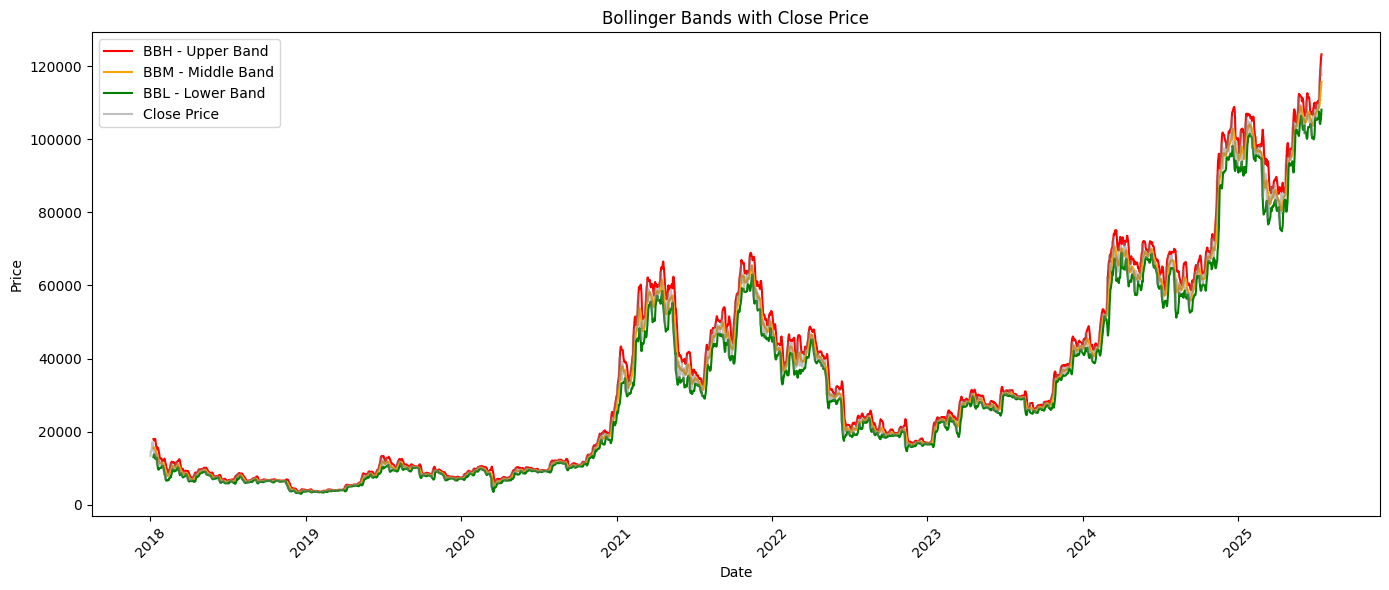

In [47]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y=df['bbh'], label='BBH - Upper Band', color='red')
sns.lineplot(x=df.index, y=df['bbm'], label='BBM - Middle Band', color='orange')
sns.lineplot(x=df.index, y=df['bbl'], label='BBL - Lower Band', color='green')
sns.lineplot(x=df.index, y=df['close'], label='Close Price', color='grey', alpha=0.5)

plt.title("Bollinger Bands with Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### *Volatility [window - 7] :*

In [48]:
# df['volatility'] = df['close'].rolling(window= 7).std().round(2)
df['volatility'] = df['close'].shift(1).rolling(window=7).std().round(2)

#### *Relative Strength Index (RSI) [window - 14]:*

In [49]:
# df['rsi'] = ta.momentum.RSIIndicator(close=df['close'], window= 14).rsi().round(2)
df['rsi'] = ta.momentum.RSIIndicator(close=df['close'].shift(1), window=14).rsi().round(2)

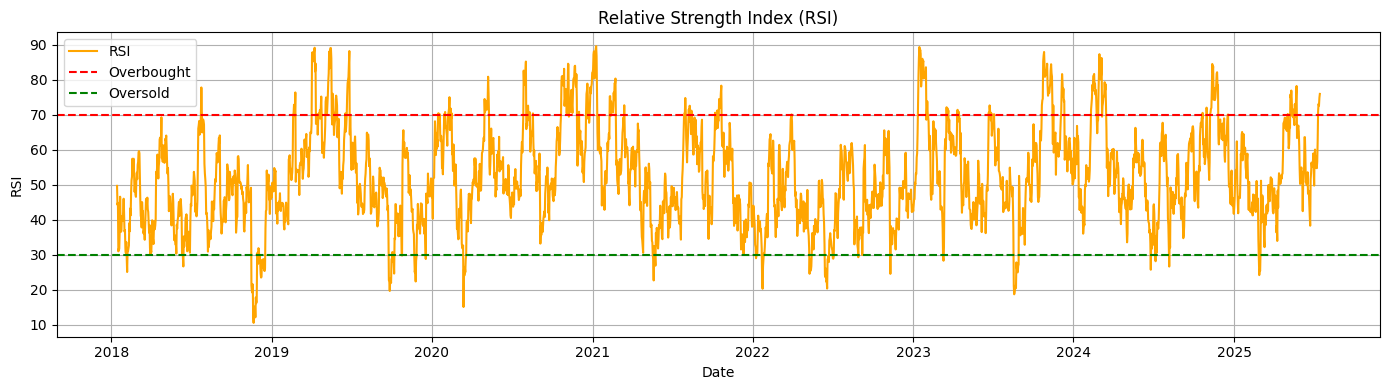

In [50]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### *7 day close momentum :*

In [51]:
# df['close_mom_7'] = df['close'] / df['close'].shift(7) - 1
df['close_mom_7'] = df['close'].shift(1) / df['close'].shift(8) - 1

In [52]:
df['close_mom_7'] = df['close_mom_7'].round(2)

In [53]:
df.head()

,open,high,low,close,volume,year,day,returns,target,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018,Monday,NaN,14675.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018,Tuesday,0.10,14919.51,NaN,13380.00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018,Wednesday,0.02,15059.54,NaN,13703.78,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018,Thursday,0.01,16960.39,NaN,14007.71,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018,Friday,0.13,17069.79,NaN,14270.67,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
year            0
day             0
returns         1
target          1
sma             7
ema             1
bbh             7
bbm             7
bbl             7
volatility      7
rsi            13
close_mom_7     8
dtype: int64

In [55]:
df.dropna(inplace=True)

In [56]:
df.head()

,open,high,low,close,volume,year,day,returns,target,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,,,,,
2018-01-14,14210.00,14339.50,12569.20,13474.99,17017.894329,2018,Sunday,-0.05,13539.93,14506.92,14370.08,16249.23,14506.92,12764.61,940.96,49.66,-0.17
2018-01-15,13477.98,14249.99,13147.79,13539.93,14652.094705,2018,Monday,0.00,10900.00,14124.77,14146.31,15356.54,14124.77,12893.00,665.23,44.25,-0.17
2018-01-16,13500.00,13542.93,9035.00,10900.00,63401.169175,2018,Tuesday,-0.19,10988.79,13930.11,13994.71,15032.60,13930.11,12827.63,595.41,44.83,-0.09
2018-01-17,10899.99,11680.99,9037.94,10988.79,72331.796646,2018,Wednesday,0.01,10961.97,13430.11,13221.04,15740.08,13430.11,11120.15,1247.52,30.94,-0.24
2018-01-18,10972.59,11878.82,10435.33,10961.97,48464.434937,2018,Thursday,-0.00,11474.98,12870.36,12662.97,15368.72,12870.36,10371.99,1349.27,31.71,-0.26


In [57]:
# df.to_csv('cleaned_data.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2018-01-14 to 2025-07-14
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2738 non-null   float64
 1   high         2738 non-null   float64
 2   low          2738 non-null   float64
 3   close        2738 non-null   float64
 4   volume       2738 non-null   float64
 5   year         2738 non-null   int32  
 6   day          2738 non-null   object 
 7   returns      2738 non-null   float64
 8   target       2738 non-null   float64
 9   sma          2738 non-null   float64
 10  ema          2738 non-null   float64
 11  bbh          2738 non-null   float64
 12  bbm          2738 non-null   float64
 13  bbl          2738 non-null   float64
 14  volatility   2738 non-null   float64
 15  rsi          2738 non-null   float64
 16  close_mom_7  2738 non-null   float64
dtypes: float64(15), int32(1), object(1)
memory usage: 374.3+ KB


In [59]:
df.drop(columns = ['day']).var()

open           7.765316e+08
high           8.065793e+08
low            7.470445e+08
close          7.791360e+08
volume         5.751190e+09
year           4.740964e+00
returns        1.231833e-03
target         7.816016e+08
sma            7.675444e+08
ema            7.670059e+08
bbh            8.398203e+08
bbm            7.675444e+08
bbl            7.018636e+08
volatility     9.617939e+05
rsi            1.876807e+02
close_mom_7    8.689195e-03
dtype: float64

### *4. Data Splitting :*

In [60]:
df.head(1)

,open,high,low,close,volume,year,day,returns,target,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,,,,,
2018-01-14,14210.0,14339.5,12569.2,13474.99,17017.894329,2018,Sunday,-0.05,13539.93,14506.92,14370.08,16249.23,14506.92,12764.61,940.96,49.66,-0.17


In [61]:
final_df = df.drop(columns= ['day','close'])
final_df.head(1)

,open,high,low,volume,year,returns,target,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,,,
2018-01-14,14210.0,14339.5,12569.2,17017.894329,2018,-0.05,13539.93,14506.92,14370.08,16249.23,14506.92,12764.61,940.96,49.66,-0.17


In [62]:
train_df = final_df[final_df['year'].between(2018, 2022)]
test_df = final_df[final_df['year'] == 2023]
forecast_df = final_df[final_df['year'] == 2024]

In [63]:
train_df = train_df.drop(columns=['year'])
test_df = test_df.drop(columns=['year'])
forecast_df = forecast_df.drop(columns=['year'])

In [64]:
X_train, y_train = train_df.drop(columns=['target']), train_df['target']
X_test, y_test = test_df.drop(columns=['target']), test_df['target']
X_forecast, y_forecast = forecast_df.drop(columns=['target']), forecast_df['target']

In [65]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape , X_forecast.shape , y_forecast.shape

((1812, 13), (1812,), (365, 13), (365,), (366, 13), (366,))

In [66]:
X_train.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,
2018-01-14,14210.00,14339.50,12569.20,17017.894329,-0.05,14506.92,14370.08,16249.23,14506.92,12764.61,940.96,49.66,-0.17
2018-01-15,13477.98,14249.99,13147.79,14652.094705,0.00,14124.77,14146.31,15356.54,14124.77,12893.00,665.23,44.25,-0.17
2018-01-16,13500.00,13542.93,9035.00,63401.169175,-0.19,13930.11,13994.71,15032.60,13930.11,12827.63,595.41,44.83,-0.09
2018-01-17,10899.99,11680.99,9037.94,72331.796646,0.01,13430.11,13221.04,15740.08,13430.11,11120.15,1247.52,30.94,-0.24
2018-01-18,10972.59,11878.82,10435.33,48464.434937,-0.00,12870.36,12662.97,15368.72,12870.36,10371.99,1349.27,31.71,-0.26


In [67]:
y_train.head()

timestamp
2018-01-14    13539.93
2018-01-15    10900.00
2018-01-16    10988.79
2018-01-17    10961.97
2018-01-18    11474.98
Name: target, dtype: float64

### *5. Standardization*

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_scaler = StandardScaler()

In [69]:
X_train.head(1)

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,
2018-01-14,14210.0,14339.5,12569.2,17017.894329,-0.05,14506.92,14370.08,16249.23,14506.92,12764.61,940.96,49.66,-0.17


In [70]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_forecast_scaled = scaler.transform(X_forecast)

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_forecast_scaled = pd.DataFrame(X_forecast_scaled, columns=X_forecast.columns, index=X_forecast.index)

In [72]:
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()
y_forecast_scaled = y_scaler.transform(y_forecast.values.reshape(-1, 1)).ravel()

In [73]:
X_train_scaled.shape , X_test_scaled.shape , X_forecast_scaled.shape , y_train_scaled.shape , y_test_scaled.shape , y_forecast_scaled.shape

((1812, 13), (365, 13), (366, 13), (1812,), (365,), (366,))

### *6. Lazy Regressor*

In [74]:
# ! pip install lazypredict

In [75]:
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_absolute_error , root_mean_squared_error
from sklearn.model_selection import train_test_split

In [76]:
X_train_scaled, X_eval_scaled, y_train_scaled , y_eval_scaled = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2, shuffle=False)

In [77]:
print(X_train_scaled.shape , X_eval_scaled.shape , X_test_scaled.shape , X_forecast_scaled.shape)
print(y_train_scaled.shape , y_eval_scaled.shape , y_test_scaled.shape , y_forecast_scaled.shape)

(1449, 13) (363, 13) (365, 13) (366, 13)
(1449,) (363,) (365,) (366,)


In [58]:
X_train_scaled.head(1)

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,
2018-01-14,-0.36,-0.38,-0.43,-0.65,-1.30,-0.34,-0.35,-0.30,-0.34,-0.39,0.19,-0.07,-1.70


In [59]:
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric= mae)
models, predictions = reg.fit(X_train_scaled, X_eval_scaled, y_train_scaled, y_eval_scaled)

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9307337820842561, 'Adjusted R-Squared': 0.9281536650845292, 'RMSE': np.float64(0.15565410617642872), 'Time taken': 0.1922752857208252, 'mae': 0.1181365908591511}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9609628537965199, 'Adjusted R-Squared': 0.9595087480640121, 'RMSE': np.float64(0.11685273321025508), 'Time taken': 0.24120426177978516, 'mae': 0.09241550735605714}
{'Model': 'BayesianRidge', 'R-Squared': 0.9881348128464431, 'Adjusted R-Squared': 0.9876928431243909, 'RMSE': np.float64(0.06442243573096385), 'Time taken': 0.01743030548095703, 'mae': 0.041891535855503606}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9195259795194634, 'Adjusted R-Squared': 0.9165283799027099, 'RMSE': np.float64(0.16777517252843535), 'Time taken': 0.03175973892211914, 'mae': 0.13003737635678575}
{'Model': 'DummyRegressor', 'R-Squared': -0.8984652582368537, 'Adjusted R-Squared': -0.969181729174043, 'RMSE': np.float64(0.8148940963281371), 'Time taken': 0.00

In [60]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mae
Model,,,,,
RidgeCV,0.99,0.99,0.06,0.02,0.04
BayesianRidge,0.99,0.99,0.06,0.02,0.04
LassoLarsIC,0.99,0.99,0.06,0.02,0.04
Ridge,0.99,0.99,0.06,0.02,0.04
LinearRegression,0.99,0.99,0.06,0.01,0.04
TransformedTargetRegressor,0.99,0.99,0.06,0.00,0.04
ElasticNetCV,0.99,0.99,0.06,0.07,0.04
LassoLarsCV,0.99,0.99,0.06,0.02,0.04
LassoCV,0.99,0.99,0.07,0.05,0.04


### *7. Feature selection [RFECV , VIF]*

* print(X_train_scaled.shape , X_eval_scaled.shape , X_test_scaled.shape , X_forecast_scaled.shape)
* print(y_train_scaled.shape , y_eval_scaled.shape , y_test_scaled.shape , y_forecast_scaled.shape)

#### *Recursive Feature Elimination (RFE) :*
* Selected Features via RFE - ['open', 'high', 'low', 'sma', 'bbh', 'bbm', 'bbl', 'ema', 'volatility']

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE

In [79]:
n_features = 7
rfe_results = {}

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

In [80]:
for name, model in models.items():
    rfe = RFE(estimator= model, n_features_to_select= n_features)
    rfe.fit(X_train_scaled, y_train_scaled)
    
    selected = X_train_scaled.columns[rfe.support_].tolist()
    rfe_results[name] = selected
    print(f"Selected Features via RFE ({name}):\n{selected}")

Selected Features via RFE (LinearRegression):
['high', 'low', 'sma', 'bbh', 'bbm', 'bbl', 'volatility']
Selected Features via RFE (RandomForest):
['open', 'high', 'low', 'sma', 'ema', 'bbh', 'bbm']
Selected Features via RFE (GradientBoosting):
['open', 'high', 'low', 'returns', 'ema', 'bbh', 'bbl']


In [81]:
rfe_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in rfe_results.items()]))
print("RFE Feature Comparison Table:")
rfe_df

RFE Feature Comparison Table:


,LinearRegression,RandomForest,GradientBoosting
0,high,open,open
1,low,high,high
2,sma,low,low
3,bbh,sma,returns
4,bbm,ema,ema
5,bbl,bbh,bbh
6,volatility,bbm,bbl


#### *Variance Inflation Factor (VIF) :*
* Selected Features via VIF - ['close_mom_7', 'rsi', 'returns', 'volume']

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


In [84]:
vif_df = calculate_vif(X_train_scaled)
print(vif_df.sort_values(by='VIF', ascending=False))

        feature               VIF
5           sma               inf
8           bbm               inf
7           bbh 10825960642717.54
9           bbl  7646179333396.43
10   volatility    82745689223.56
6           ema           7747.96
0          open           2159.47
1          high           1303.26
2           low            581.76
12  close_mom_7              2.86
11          rsi              2.54
4       returns              1.83
3        volume              1.16


### *8. Model Development:*

#### *Gradient Boosting : optuna*

In [85]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [86]:
print(X_train_scaled.shape , X_eval_scaled.shape , X_test_scaled.shape , X_forecast_scaled.shape)
print(y_train_scaled.shape , y_eval_scaled.shape , y_test_scaled.shape , y_forecast_scaled.shape)

(1449, 13) (363, 13) (365, 13) (366, 13)
(1449,) (363,) (365,) (366,)


In [87]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 200),
        "max_depth": trial.suggest_int("max_depth", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    }
    
    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_eval_scaled)
    
    return root_mean_squared_error(y_eval_scaled, preds)

In [88]:
sampler = optuna.samplers.TPESampler(seed=42)
study1 = optuna.create_study(direction="minimize", sampler=sampler)

study1.optimize(objective, n_trials=30)

[I 2025-07-20 18:03:41,235] A new study created in memory with name: no-name-66ae0a1f-3910-4805-bb56-089c44237e8f
[I 2025-07-20 18:03:43,396] Trial 0 finished with value: 0.13166706582340226 and parameters: {'n_estimators': 137, 'max_depth': 5, 'learning_rate': 0.22227824312530747, 'subsample': 0.7993292420985183, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.13166706582340226.
[I 2025-07-20 18:03:45,792] Trial 1 finished with value: 0.11666791373615643 and parameters: {'n_estimators': 105, 'max_depth': 5, 'learning_rate': 0.18432335340553055, 'subsample': 0.8540362888980227, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.11666791373615643.
[I 2025-07-20 18:03:46,893] Trial 2 finished with value: 0.09804799462183392 and parameters: {'n_estimators': 184, 'max_depth': 2, 'learning_rate': 0.06272924049005918, 'subsample': 0.5917022549267169, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.0980479

In [89]:
op_df = study1.trials_dataframe()
op_df.sort_values("value").head()

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_min_samples_leaf,params_min_samples_split,params_n_estimators,params_subsample,state
15,15,0.09,2025-07-20 18:04:11.181292,2025-07-20 18:04:12.729553,0 days 00:00:01.548261,0.06,2,5,8,180,0.58,COMPLETE
10,10,0.10,2025-07-20 18:04:00.483613,2025-07-20 18:04:02.990393,0 days 00:00:02.506780,0.12,3,7,6,198,0.51,COMPLETE
2,2,0.10,2025-07-20 18:03:45.792309,2025-07-20 18:03:46.893409,0 days 00:00:01.101100,0.06,2,6,4,184,0.59,COMPLETE
16,16,0.10,2025-07-20 18:04:12.729553,2025-07-20 18:04:14.354273,0 days 00:00:01.624720,0.02,3,3,8,173,0.55,COMPLETE
12,12,0.10,2025-07-20 18:04:04.423800,2025-07-20 18:04:06.307288,0 days 00:00:01.883488,0.14,3,7,6,198,0.65,COMPLETE


In [90]:
print("Best Params:", study1.best_params)
print("Best RMSE:", study1.best_value)

Best Params: {'n_estimators': 180, 'max_depth': 2, 'learning_rate': 0.06225542925373318, 'subsample': 0.5779444115500851, 'min_samples_split': 8, 'min_samples_leaf': 5}
Best RMSE: 0.09283091063826918


#### *Model Building: Gradient Boosting Regressor :*

- **Train Score :**
* R² Score: 0.9990403703834414
* MAE: 290.03170752994316
* RMSE: 553.3084311415848

- **Eval Score :**
* R² Score: 0.960530637704832
* MAE: 1538.1144308514665
* RMSE: 2001.0700187714704

In [91]:
best_params = study1.best_params

gbr_model = GradientBoostingRegressor(**best_params, random_state=42)
gbr_model.fit(X_train_scaled, y_train_scaled)

,loss,'squared_error'
,learning_rate,0.06225542925373318
,n_estimators,180
,subsample,0.5779444115500851
,criterion,'friedman_mse'
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [92]:
# Train Score
y_train_pred = gbr_model.predict(X_train_scaled)

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

In [93]:
print(y_train_pred_original[:4])
print(y_train_original[:4])

[13233.98194643 12818.78724024 10964.57339362 10779.39212711]
[13539.93 10900.   10988.79 10961.97]


In [94]:
print('Train Score')
print("R² Score:", r2_score(y_train_original, y_train_pred_original))
print("MAE:", mean_absolute_error(y_train_original, y_train_pred_original))
print("RMSE:", root_mean_squared_error(y_train_original, y_train_pred_original))

Train Score
R² Score: 0.9977313667830711
MAE: 481.73094495191907
RMSE: 850.7414826659008


In [95]:
# Eval Score
y_eval_pred = gbr_model.predict(X_eval_scaled)

y_eval_pred_original = y_scaler.inverse_transform(y_eval_pred.reshape(-1, 1)).ravel()
y_eval_original = y_scaler.inverse_transform(y_eval_scaled.reshape(-1, 1)).ravel()

In [96]:
print(y_eval_pred_original[:4])
print(y_eval_original[:4])

[46688.60328841 46344.23837316 43842.83231602 42549.15925582]
[45827.42 43444.5  43083.4  41565.32]


In [97]:
print('Eval Score')
print("R² Score:", r2_score(y_eval_original, y_eval_pred_original))
print("MAE:", mean_absolute_error(y_eval_original, y_eval_pred_original))
print("RMSE:", root_mean_squared_error(y_eval_original, y_eval_pred_original))

Eval Score
R² Score: 0.9753631299638028
MAE: 1157.6344120881622
RMSE: 1580.9749787397345


#### *Random Forest : optuna*

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        # "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }
    
    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_eval_scaled)
    
    return mean_absolute_error(y_eval_scaled, preds)

In [100]:
sampler = optuna.samplers.TPESampler(seed=42)
study2 = optuna.create_study(direction="minimize", sampler=sampler)

[I 2025-07-20 18:04:53,852] A new study created in memory with name: no-name-a1eb9d63-71b8-44c2-b214-ec54ccd90a92


In [101]:
study2.optimize(objective, n_trials=30)

[I 2025-07-20 18:04:55,440] Trial 0 finished with value: 0.0921441715007033 and parameters: {'n_estimators': 175, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.0921441715007033.
[I 2025-07-20 18:04:56,305] Trial 1 finished with value: 0.10891752172932304 and parameters: {'n_estimators': 111, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 0.0921441715007033.
[I 2025-07-20 18:04:58,098] Trial 2 finished with value: 0.10874227044377031 and parameters: {'n_estimators': 267, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.0921441715007033.
[I 2025-07-20 18:04:59,705] Trial 3 finished with value: 0.11235562092132519 and parameters: {'n_estimators': 186, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.0921441715007033.
[I 2025-07-2

In [102]:
op_df = study2.trials_dataframe()
op_df.sort_values("value").head()

,number,value,datetime_start,datetime_complete,duration,params_bootstrap,params_max_depth,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
14,14,0.09,2025-07-20 18:05:13.838699,2025-07-20 18:05:15.198839,0 days 00:00:01.360140,True,11,2,5,251,COMPLETE
13,13,0.09,2025-07-20 18:05:12.567069,2025-07-20 18:05:13.837689,0 days 00:00:01.270620,True,11,2,5,258,COMPLETE
22,22,0.09,2025-07-20 18:05:24.198507,2025-07-20 18:05:25.215149,0 days 00:00:01.016642,True,5,2,5,265,COMPLETE
23,23,0.09,2025-07-20 18:05:25.224540,2025-07-20 18:05:26.484807,0 days 00:00:01.260267,True,6,1,5,266,COMPLETE
21,21,0.09,2025-07-20 18:05:22.794799,2025-07-20 18:05:24.198507,0 days 00:00:01.403708,True,9,2,4,233,COMPLETE


In [103]:
print("Best Parameters:", study2.best_params)
print("Best RMSE:", study2.best_value)

Best Parameters: {'n_estimators': 251, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}
Best RMSE: 0.09031424608353046


#### *Model Building: Random Forest Regressor :*

- **Train Score :**
* R² Score: 0.9990403703834414
* MAE: 290.03170752994316
* RMSE: 553.3084311415848

- **Eval Score :**
* R² Score: 0.960530637704832
* MAE: 1538.1144308514665
* RMSE: 2001.0700187714704

In [104]:
best_params = study2.best_params

rf_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train_scaled)

,n_estimators,251
,criterion,'squared_error'
,max_depth,11
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [105]:
# Train Score
y_train_pred = rf_model.predict(X_train_scaled)

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

In [106]:
print(y_train_pred_original[:4])
print(y_train_original[:4])

[13647.07127643 12562.59367538 11009.4915986  11095.04665146]
[13539.93 10900.   10988.79 10961.97]


In [107]:
print('Train Score')
print("R² Score:", r2_score(y_train_original, y_train_pred_original))
print("MAE:", mean_absolute_error(y_train_original, y_train_pred_original))
print("RMSE:", root_mean_squared_error(y_train_original, y_train_pred_original))

Train Score
R² Score: 0.9990403703834414
MAE: 290.0317075299433
RMSE: 553.308431141585


In [108]:
# Eval Score
y_eval_pred = rf_model.predict(X_eval_scaled)

y_eval_pred_original = y_scaler.inverse_transform(y_eval_pred.reshape(-1, 1)).ravel()
y_eval_original = y_scaler.inverse_transform(y_eval_scaled.reshape(-1, 1)).ravel()

In [109]:
print(y_eval_pred_original[:4])
print(y_eval_original[:4])

[46762.55120578 47177.63360649 44346.29213469 42959.37395885]
[45827.42 43444.5  43083.4  41565.32]


In [110]:
print('Eval Score')
print("R² Score:", r2_score(y_eval_original, y_eval_pred_original))
print("MAE:", mean_absolute_error(y_eval_original, y_eval_pred_original))
print("RMSE:", root_mean_squared_error(y_eval_original, y_eval_pred_original))

Eval Score
R² Score: 0.960530637704832
MAE: 1538.1144308514665
RMSE: 2001.0700187714701


#### *Model Building: Linear Regressor :*

- **Train Score :**
* R2 Score of Train data : 0.996273990159883
* Mean Absolute Error of Train data : 0.03477580888865742
* Root Mean Squared Error of Train data : 0.06389950445237554

- **Eval Score :**
* R2 Score of Eval data : 0.988262917550716
* Mean Absolute Error of Eval data : 0.04198143221155605
* Root Mean Squared Error of Eval data : 0.06462495180746318

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error, root_mean_squared_error

In [112]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train_scaled)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [119]:
train_pred = lr_model.predict(X_train_scaled)
print('Train Score - scaled output')
print('R2 Score of Train data :', r2_score(train_pred, y_train_scaled))
print('Mean Absolute Error of Train data :',mean_absolute_error(train_pred,y_train_scaled))
print('Root Mean Squared Error of Train data :',root_mean_squared_error(train_pred,y_train_scaled))

Train Score - scaled output
R2 Score of Train data : 0.996273990159883
Mean Absolute Error of Train data : 0.03477580888865742
Root Mean Squared Error of Train data : 0.06389950445237554


In [120]:
eval_pred = lr_model.predict(X_eval_scaled)
print('Eval Score - scaled output ')
print('R2 Score of Eval data :', r2_score(eval_pred, y_eval_scaled))
print('Mean Absolute Error of Eval data :',mean_absolute_error(eval_pred, y_eval_scaled))
print('Root Mean Squared Error of Eval data :',root_mean_squared_error(eval_pred, y_eval_scaled))

Eval Score - scaled output 
R2 Score of Eval data : 0.988262917550716
Mean Absolute Error of Eval data : 0.04198143221155605
Root Mean Squared Error of Eval data : 0.06462495180746318


In [121]:
# Train Score
y_train_pred = lr_model.predict(X_train_scaled)

y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

In [122]:
print('Train Score')
print('R2 Score of Train data :', r2_score(y_train_original, y_train_pred_original))
print('Mean Absolute Error of Train data :',mean_absolute_error(y_train_original, y_train_pred_original))
print('Root Mean Squared Error of Train data :',root_mean_squared_error(y_train_original, y_train_pred_original))

Train Score
R2 Score of Train data : 0.9962878217724793
Mean Absolute Error of Train data : 592.2562144482195
Root Mean Squared Error of Train data : 1088.2530075216937


In [123]:
# Eval Score
y_eval_pred = lr_model.predict(X_eval_scaled)

y_eval_pred_original = y_scaler.inverse_transform(y_eval_pred.reshape(-1, 1)).ravel()
y_eval_original = y_scaler.inverse_transform(y_eval_scaled.reshape(-1, 1)).ravel()

In [124]:
print('Eval Score')
print('R2 Score of Eval data :', r2_score(y_eval_original, y_eval_pred_original))
print('Mean Absolute Error of Eval data :',mean_absolute_error(y_eval_original, y_eval_pred_original))
print('Root Mean Squared Error of Eval data :',root_mean_squared_error(y_eval_original, y_eval_pred_original))

Eval Score
R2 Score of Eval data : 0.9880600976344671
Mean Absolute Error of Eval data : 714.9729916660648
Root Mean Squared Error of Eval data : 1100.607880579609


### *9. Model Evaluation :*

In [139]:
import joblib
gbr_model = joblib.load("gbr_model.pkl")
rf_model = joblib.load("rf_model.pkl")
lr_model = joblib.load("lr_model.pkl")

In [140]:
scaler = joblib.load('standard_scaler.pkl')
y_scaler = joblib.load('y_standard_scaler.pkl')

#### *Linear Regressor :*

- *Test Score :*
* R2 Score of Train data : 0.9861694929689945
* Mean Absolute Error of Train data : 467.47417824728205
* Root Mean Squared Error of Train data : 695.3822524537684

In [141]:
# Test Score
y_test_pred = lr_model.predict(X_test_scaled)

y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1,1)).ravel()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()

In [142]:
print(y_test_original[:4])
print(y_test_pred_original[:4])

[16672.63 16675.58 16850.99 16832.02]
[16432.15032388 16660.46690623 16604.9003502  16700.98324822]


In [143]:
print('Test Score')
print('R2 Score of Test data :', r2_score(y_test_original, y_test_pred_original))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_original, y_test_pred_original))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_original, y_test_pred_original))

Test Score
R2 Score of Test data : 0.9861694929689945
Mean Absolute Error of Test data : 467.47417824728205
Root Mean Squared Error of Test data : 695.3822524537684


In [144]:
# test score for scaled data
print('Test Score - scaled data')
print('R2 Score of Test data :', r2_score(y_test_scaled, y_test_pred))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_scaled, y_test_pred))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_scaled, y_test_pred))

Test Score - scaled data
R2 Score of Test data : 0.9861694929689945
Mean Absolute Error of Test data : 0.02744891870531985
Root Mean Squared Error of Test data : 0.04083111282914304


#### *Gradient Boosting Regressor :*

- *Test Score :*
* R2 Score of Train data : 0.9237313323568246
* Mean Absolute Error of Train data : 1380.5144096229753
* Root Mean Squared Error of Train data : 1632.9678385839943

In [145]:
# Test Score
y_test_pred = gbr_model.predict(X_test_scaled)

y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1,1)).ravel()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()

In [146]:
print(y_test_original[:4])
print(y_test_pred_original[:4])

[16672.63 16675.58 16850.99 16832.02]
[17313.10465671 17413.83206599 17397.25090264 17446.5920658 ]


In [147]:
print('Test Score')
print('R2 Score of Test data :', r2_score(y_test_original, y_test_pred_original))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_original, y_test_pred_original))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_original, y_test_pred_original))

Test Score
R2 Score of Test data : 0.8935125720958216
Mean Absolute Error of Test data : 1704.2788119071797
Root Mean Squared Error of Test data : 1929.539707099997


In [148]:
# test score for scaled data
print('Test Score - scaled data')
print('R2 Score of Test data :', r2_score(y_test_scaled, y_test_pred))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_scaled, y_test_pred))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_scaled, y_test_pred))

Test Score - scaled data
R2 Score of Test data : 0.8935125720958216
Mean Absolute Error of Test data : 0.10007100442346469
Root Mean Squared Error of Test data : 0.1132977627929173


#### *Random Forest Regressor :*

- *Test Score :*
* R2 Score of Train data : 0.8935125720958216
* Mean Absolute Error of Train data : 1704.2788119071797
* Root Mean Squared Error of Train data : 1929.539707099997

In [149]:
# Test Score
y_test_pred = rf_model.predict(X_test_scaled)

y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1,1)).ravel()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()

In [150]:
print(y_test_original[:4])
print(y_test_pred_original[:4])

[16672.63 16675.58 16850.99 16832.02]
[17313.10465671 17413.83206599 17397.25090264 17446.5920658 ]


In [151]:
print('Test Score')
print('R2 Score of Test data :', r2_score(y_test_original, y_test_pred_original))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_original, y_test_pred_original))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_original, y_test_pred_original))

Test Score
R2 Score of Test data : 0.8935125720958216
Mean Absolute Error of Test data : 1704.2788119071793
Root Mean Squared Error of Test data : 1929.5397070999968


In [152]:
# test score for scaled data
print('Test Score - scaled data')
print('R2 Score of Test data :', r2_score(y_test_scaled, y_test_pred))
print('Mean Absolute Error of Test data :', mean_absolute_error(y_test_scaled, y_test_pred))
print('Root Mean Squared Error of Test data :', root_mean_squared_error(y_test_scaled, y_test_pred))

Test Score - scaled data
R2 Score of Test data : 0.8935125720958216
Mean Absolute Error of Test data : 0.10007100442346464
Root Mean Squared Error of Test data : 0.11329776279291727


### *Pipeline Construction :*

In [153]:
print(X_train_scaled.shape , X_eval_scaled.shape , X_test_scaled.shape , X_forecast_scaled.shape)
print(y_train_scaled.shape , y_eval_scaled.shape , y_test_scaled.shape , y_forecast_scaled.shape)

(1449, 13) (363, 13) (365, 13) (366, 13)
(1449,) (363,) (365,) (366,)


In [154]:
import joblib
gbr_model = joblib.load("gbr_model.pkl")
rf_model = joblib.load("rf_model.pkl")
lr_model = joblib.load("lr_model.pkl")

scaler = joblib.load('standard_scaler.pkl')
y_scaler = joblib.load('y_standard_scaler.pkl')

In [155]:
gbr_model


,n_estimators,251
,criterion,'squared_error'
,max_depth,11
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
rf_model

,n_estimators,251
,criterion,'squared_error'
,max_depth,11
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [157]:
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [158]:
# joblib.dump(rf_model, "gbr_model.pkl")
# joblib.dump(rf_model, "rf_model.pkl")
# joblib.dump(lr_model, "lr_model.pkl")

In [159]:
# joblib.dump(scaler, 'standard_scaler.pkl')
# joblib.dump(y_scaler, 'y_standard_scaler.pkl')

### *Pipeline - Test Data [2023] :*

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin

In [161]:
class PretrainedModel(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return self.model.predict(X)

#### *final_pipeline1 :*

In [162]:
# final_pipeline = Pipeline([
#     ("scaler", scaler),
#     ("lr_model", PretrainedModel(lr_model))
# ])

In [163]:
# joblib.dump(final_pipeline, 'Reg_model_pipeline.pkl')

In [164]:
final_pipeline = joblib.load('Reg_model_pipeline.pkl')

In [165]:
final_pipeline

,steps,"[('scaler', ...), ('lr_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,model,LinearRegression()
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [166]:
X_test.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,
2023-01-01,16541.78,16629.10,16498.93,96040.81,0.00,16684.39,16655.22,16951.72,16684.39,16417.07,144.37,42.40,-0.02
2023-01-02,16616.79,16799.20,16548.50,120793.35,0.00,16653.63,16645.61,16894.07,16653.63,16413.18,129.85,44.33,-0.01
2023-01-03,16672.96,16777.02,16605.20,158318.74,0.00,16618.32,16652.37,16730.35,16618.32,16506.29,60.50,45.79,-0.01
2023-01-04,16675.18,16989.80,16651.70,220000.15,0.01,16613.94,16658.17,16713.61,16613.94,16514.28,53.83,45.87,-0.00
2023-01-05,16851.36,16879.10,16748.30,163187.92,-0.00,16657.28,16706.37,16836.22,16657.28,16478.34,96.64,50.58,0.02


In [167]:
y_test.head()

timestamp
2023-01-01   16672.63
2023-01-02   16675.58
2023-01-03   16850.99
2023-01-04   16832.02
2023-01-05   16950.32
Name: target, dtype: float64

In [168]:
y_test_pred_scaled = final_pipeline.predict(X_test)
y_test_pred_original = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

In [169]:
df_test = X_test.copy()
df_test['actual_close'] = y_test
df_test['predicted_close'] = y_test_pred_original

In [170]:
df_test.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7,actual_close,predicted_close
timestamp,,,,,,,,,,,,,,,
2023-01-01,16541.78,16629.10,16498.93,96040.81,0.00,16684.39,16655.22,16951.72,16684.39,16417.07,144.37,42.40,-0.02,16672.63,16432.15
2023-01-02,16616.79,16799.20,16548.50,120793.35,0.00,16653.63,16645.61,16894.07,16653.63,16413.18,129.85,44.33,-0.01,16675.58,16660.47
2023-01-03,16672.96,16777.02,16605.20,158318.74,0.00,16618.32,16652.37,16730.35,16618.32,16506.29,60.50,45.79,-0.01,16850.99,16604.90
2023-01-04,16675.18,16989.80,16651.70,220000.15,0.01,16613.94,16658.17,16713.61,16613.94,16514.28,53.83,45.87,-0.00,16832.02,16700.98
2023-01-05,16851.36,16879.10,16748.30,163187.92,-0.00,16657.28,16706.37,16836.22,16657.28,16478.34,96.64,50.58,0.02,16950.32,16690.05


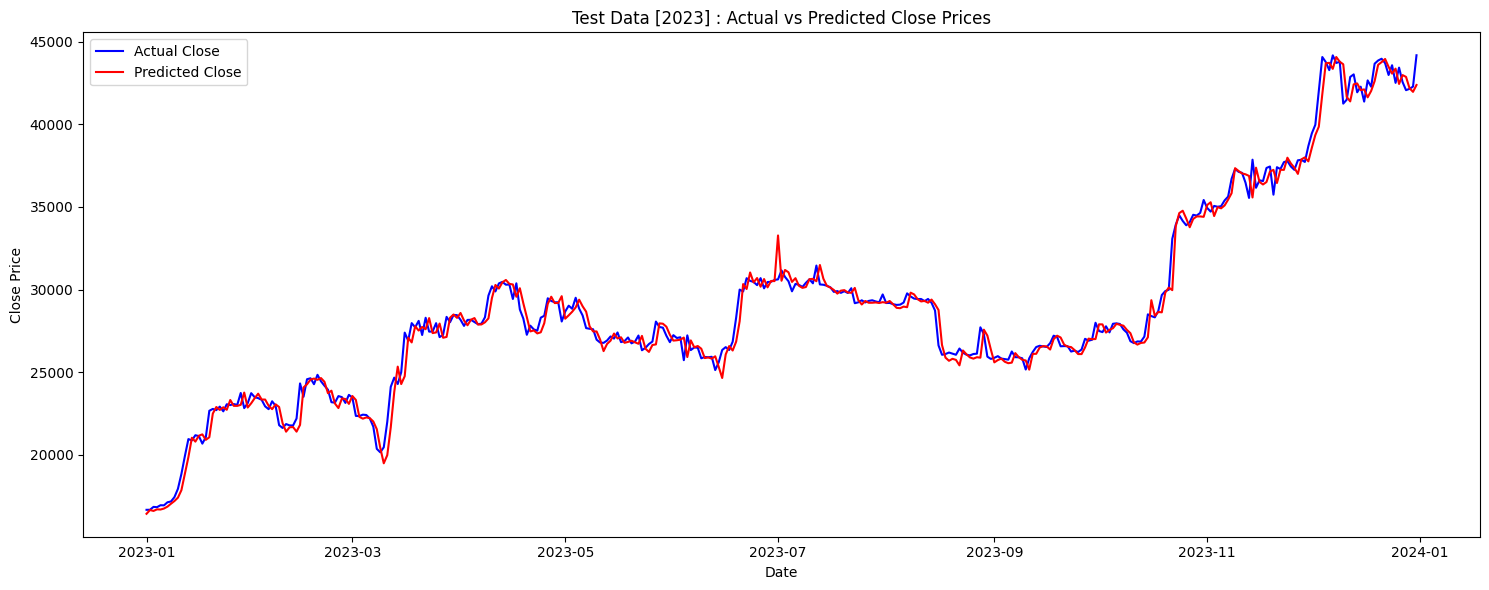

In [171]:
plt.figure(figsize=(15, 6))
plt.plot(df_test.index, df_test['actual_close'], label='Actual Close', color='blue')
plt.plot(df_test.index, df_test['predicted_close'], label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Test Data [2023] : Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### *Pipeline - Forcast Data [2024] :*

In [172]:
y_forcast_pred_scaled = final_pipeline.predict(X_forecast)
y_forcast_pred_original = y_scaler.inverse_transform(y_forcast_pred_scaled.reshape(-1, 1)).ravel()

In [173]:
df_forcast = X_forecast.copy()
df_forcast['actual_close'] = y_forecast
df_forcast['predicted_close'] = y_forcast_pred_original
df_forcast.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7,actual_close,predicted_close
timestamp,,,,,,,,,,,,,,,
2024-01-01,42283.58,44188.28,42180.81,26548.61,0.04,42654.10,42545.86,43781.18,42654.10,41527.03,608.69,51.26,-0.02,44955.90,43576.71
2024-01-02,44181.40,45996.20,44148.34,66341.09,0.02,42740.31,42954.28,44184.08,42740.31,41296.53,779.73,60.38,0.01,42845.22,45420.41
2024-01-03,44955.90,45512.52,39925.40,101430.93,-0.05,43089.87,43454.69,45180.37,43089.87,40999.38,1128.99,63.40,0.06,44149.75,42755.53
2024-01-04,42845.23,44891.91,42393.30,55234.61,0.03,43006.06,43302.32,45081.98,43006.06,40930.15,1121.12,51.83,-0.01,44145.11,44087.59
2024-01-05,44140.67,44312.40,42000.00,56331.10,-0.00,43232.63,43514.18,45409.73,43232.63,41055.54,1175.76,57.05,0.04,43969.22,43161.34


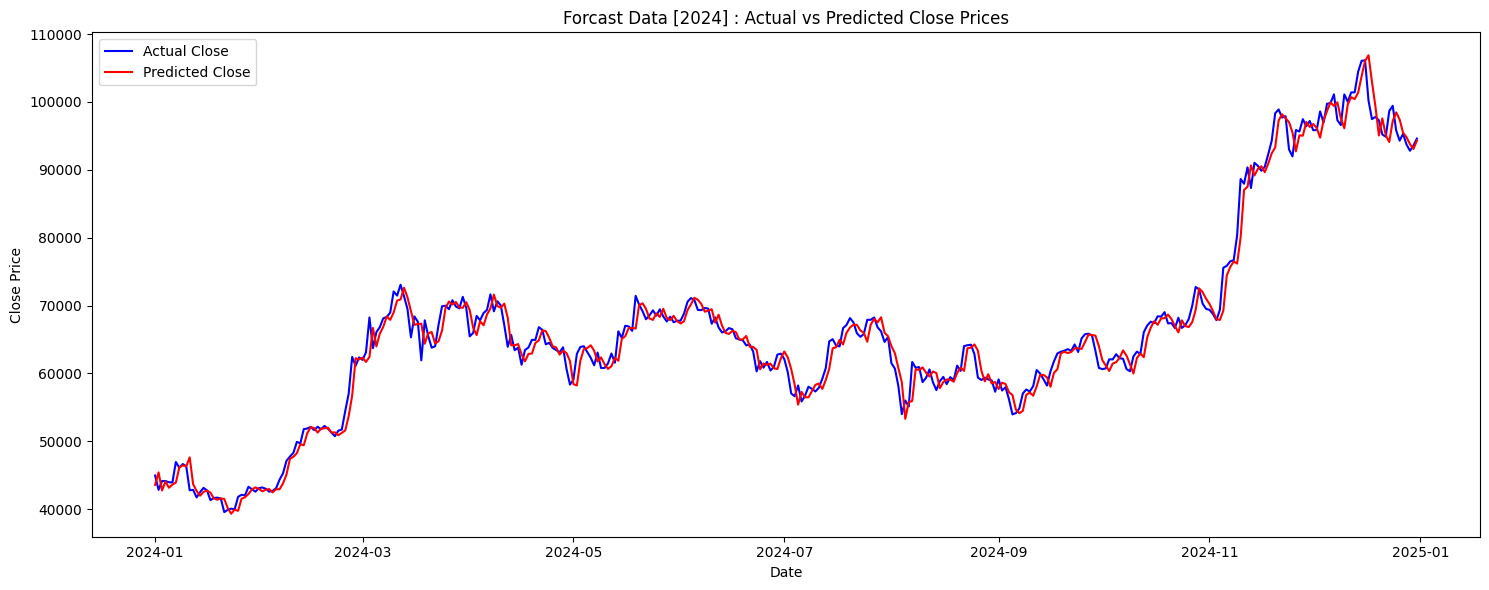

In [174]:
plt.figure(figsize=(15, 6))
plt.plot(df_forcast.index, df_forcast['actual_close'], label='Actual Close', color='blue')
plt.plot(df_forcast.index, df_forcast['predicted_close'], label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forcast Data [2024] : Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### *Future prediction [2025] :*

In [175]:
future_df = final_df[final_df['year'] == 2025]
future_df = future_df.drop(columns=['target','year'])
future_df.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7
timestamp,,,,,,,,,,,,,
2025-01-01,93579.73,95169.99,92918.11,1519.71,0.01,94995.66,94661.37,99094.39,94995.66,90896.93,2213.56,43.59,-0.05
2025-01-02,94604.84,97826.69,94400.01,2878.22,0.03,94305.29,94648.05,96225.78,94305.29,92384.79,1037.19,46.15,-0.05
2025-01-03,96999.90,98969.23,96111.73,1758.97,0.01,94472.68,95231.47,96997.71,94472.68,91947.65,1363.67,51.61,0.01
2025-01-04,98173.91,98787.97,97551.85,893.50,0.00,95025.78,95967.08,98626.27,95025.78,91425.30,1944.48,54.12,0.04
2025-01-05,98230.26,98813.86,97300.00,678.88,0.00,95443.81,96532.87,99696.81,95443.81,91190.81,2296.88,54.24,0.03


In [176]:
y_fut_pred_scaled = final_pipeline.predict(future_df)
y_fut_pred_original = y_scaler.inverse_transform(y_fut_pred_scaled.reshape(-1, 1)).ravel()

In [177]:
df_future = future_df.copy()
df_future['actual_close'] = final_df[final_df['year'] == 2025][['target']]
df_future['predicted_close'] = y_fut_pred_original
df_future.head()

,open,high,low,volume,returns,sma,ema,bbh,bbm,bbl,volatility,rsi,close_mom_7,actual_close,predicted_close
timestamp,,,,,,,,,,,,,,,
2025-01-01,93579.73,95169.99,92918.11,1519.71,0.01,94995.66,94661.37,99094.39,94995.66,90896.93,2213.56,43.59,-0.05,96981.72,93917.55
2025-01-02,94604.84,97826.69,94400.01,2878.22,0.03,94305.29,94648.05,96225.78,94305.29,92384.79,1037.19,46.15,-0.05,98173.90,96530.58
2025-01-03,96999.90,98969.23,96111.73,1758.97,0.01,94472.68,95231.47,96997.71,94472.68,91947.65,1363.67,51.61,0.01,98230.25,97665.33
2025-01-04,98173.91,98787.97,97551.85,893.50,0.00,95025.78,95967.08,98626.27,95025.78,91425.30,1944.48,54.12,0.04,98364.76,97900.52
2025-01-05,98230.26,98813.86,97300.00,678.88,0.00,95443.81,96532.87,99696.81,95443.81,91190.81,2296.88,54.24,0.03,102227.56,97854.85


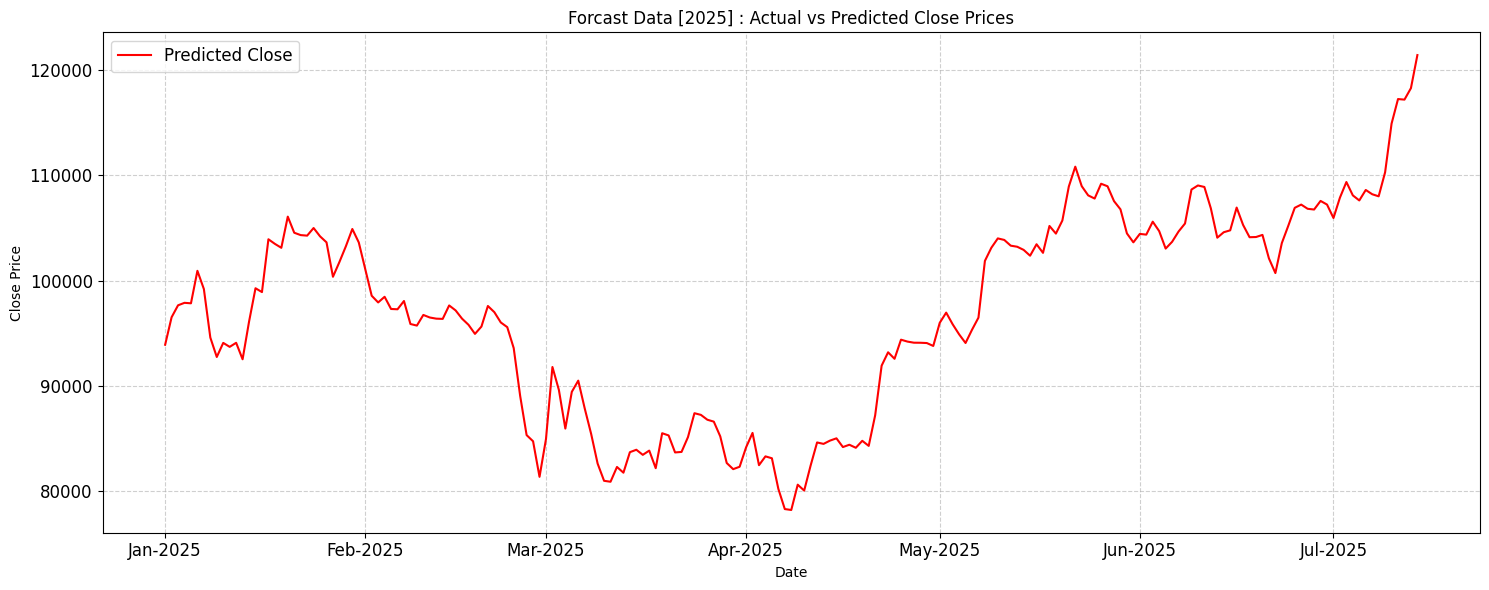

In [178]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
# plt.plot(df_future.index, df_future['actual_close'], label='Actual Close', color='blue')
plt.plot(df_future.index, df_future['predicted_close'], label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forcast Data [2025] : Actual vs Predicted Close Prices')

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



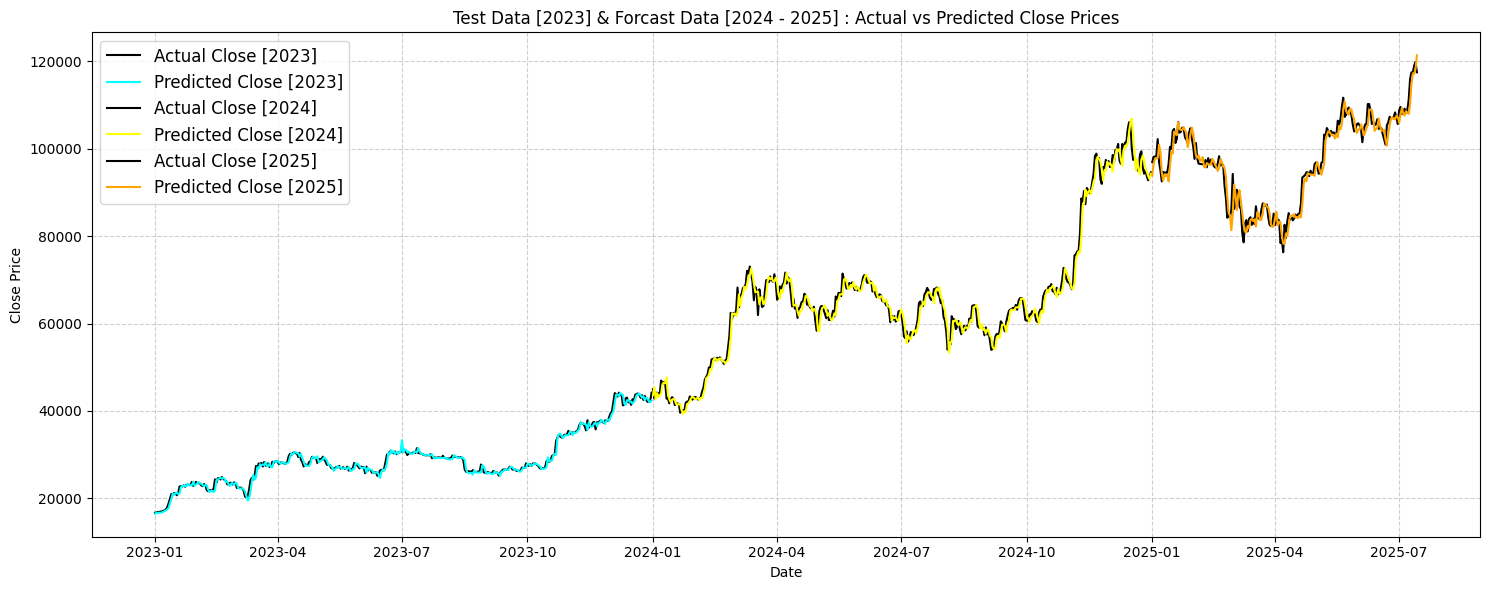

In [179]:
plt.figure(figsize=(15, 6))

plt.plot(df_test.index, df_test['actual_close'], label='Actual Close [2023]', color='black')
plt.plot(df_test.index, df_test['predicted_close'], label='Predicted Close [2023]', color='cyan')
plt.plot(df_forcast.index, df_forcast['actual_close'], label='Actual Close [2024]', color='black')
plt.plot(df_forcast.index, df_forcast['predicted_close'], label='Predicted Close [2024]', color='yellow')

plt.plot(df_future.index, df_future['actual_close'], label='Actual Close [2025]', color='black')
plt.plot(df_future.index, df_future['predicted_close'], label='Predicted Close [2025]', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Test Data [2023] & Forcast Data [2024 - 2025] : Actual vs Predicted Close Prices')
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### *Final Combined Visualization (2018–2025) :*

In [180]:
df_train = train_df.copy()
df_test = test_df.copy()
df_forecast = forecast_df.copy()

In [181]:
y_test_pred = final_pipeline.predict(X_test)
y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

df_test_pred = df_test.copy()
df_test_pred['predicted_close'] = y_test_pred_original

In [182]:
y_forecast_pred = final_pipeline.predict(X_forecast)
y_forecast_pred_original = y_scaler.inverse_transform(y_forecast_pred.reshape(-1, 1)).ravel()

df_forecast_pred = df_forecast.copy()
df_forecast_pred['predicted_close'] = y_forecast_pred_original

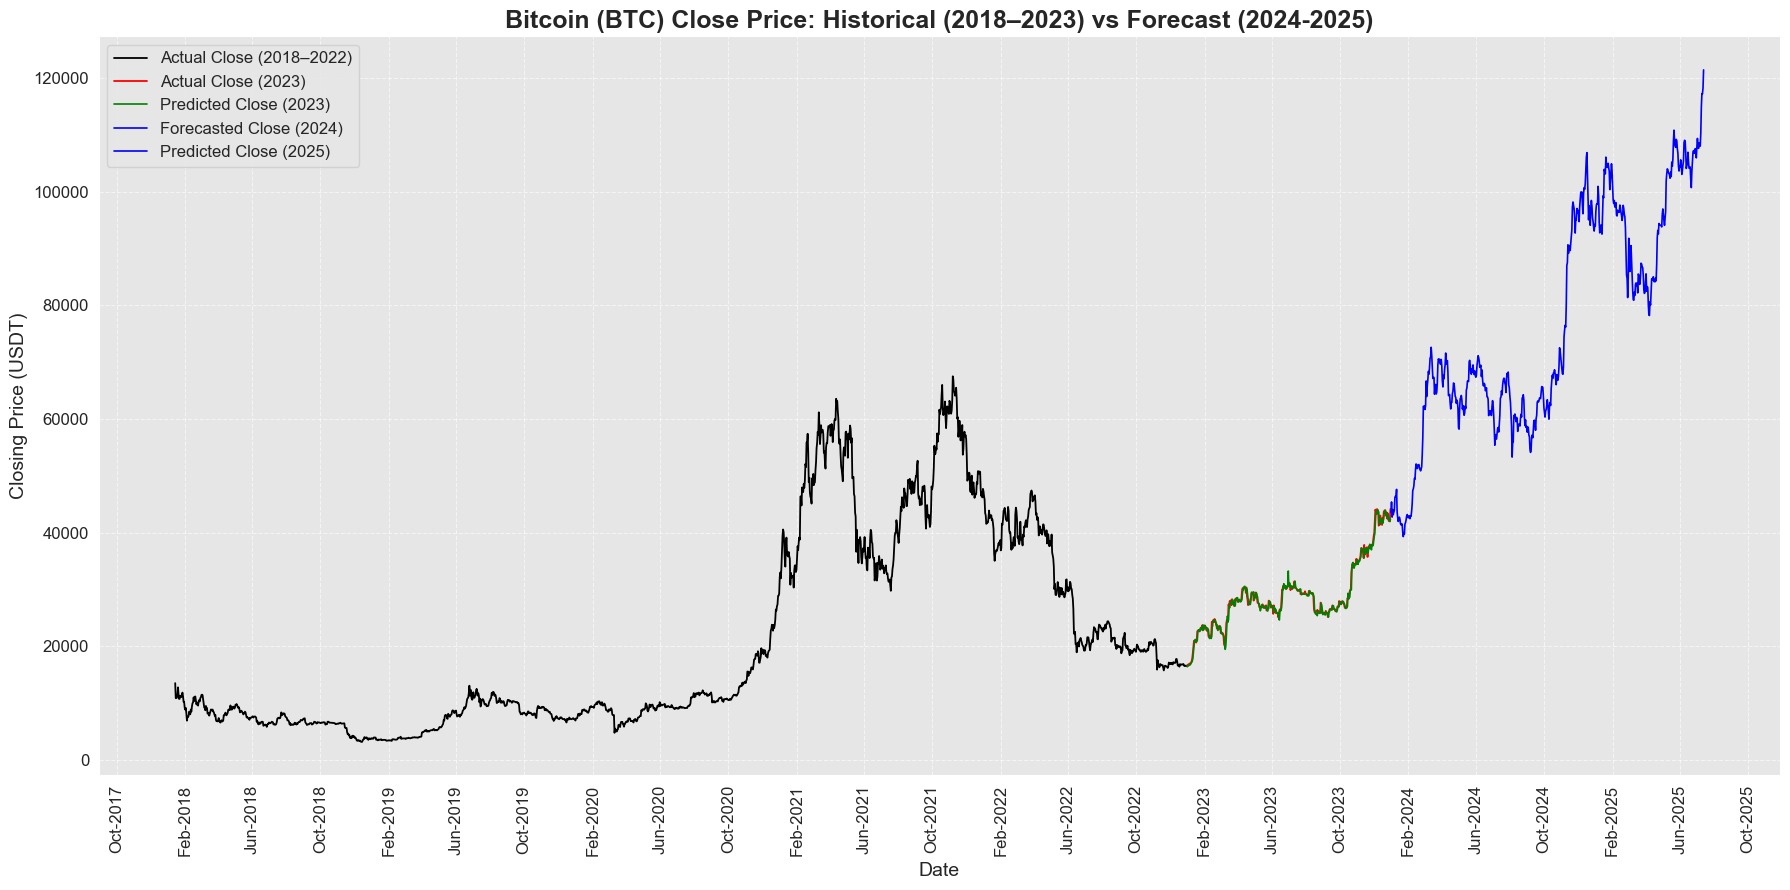

In [183]:
plt.figure(figsize=(18, 9))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.plot(df_train.index, df_train['target'], label='Actual Close (2018–2022)', color='black', linewidth=1.3)
plt.plot(df_test.index, df_test['target'], label='Actual Close (2023)', color='red', linewidth=1.3)
plt.plot(df_test_pred.index, df_test_pred['predicted_close'], label='Predicted Close (2023)', color='green', linewidth=1.2)
plt.plot(df_forecast_pred.index, df_forecast_pred['predicted_close'], label='Forecasted Close (2024)', color='blue', linewidth=1.2)
plt.plot(df_future.index, df_future['predicted_close'], label='Predicted Close (2025)', color='blue', linewidth=1.2)

plt.title("Bitcoin (BTC) Close Price: Historical (2018–2023) vs Forecast (2024-2025)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USDT)", fontsize=14)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))

plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### *Error Analysis :*

In [184]:
df_test_pred['actual_close'] = df_test['target']
df_test_pred['error'] = df_test_pred['predicted_close'] - df_test_pred['actual_close']
df_test_pred['abs_error'] = df_test_pred['error'].abs()
df_test_pred['perc_error'] = (df_test_pred['abs_error'] / df_test_pred['actual_close']) * 100


In [185]:
high_error_df = df_test_pred[df_test_pred['perc_error'] > 5]
high_error_df = high_error_df.sort_values(by='perc_error', ascending=False)

# Display top 5 high-error dates
high_error_df[['actual_close', 'predicted_close', 'error', 'perc_error']].head()


,actual_close,predicted_close,error,perc_error
timestamp,,,,
2023-02-14,24323.48,21811.49,-2511.99,10.33
2023-03-12,24112.89,21661.50,-2451.39,10.17
2023-03-16,27394.98,24756.87,-2638.11,9.63
2023-10-22,33069.99,29964.84,-3105.15,9.39
2023-03-11,21997.02,19979.56,-2017.46,9.17


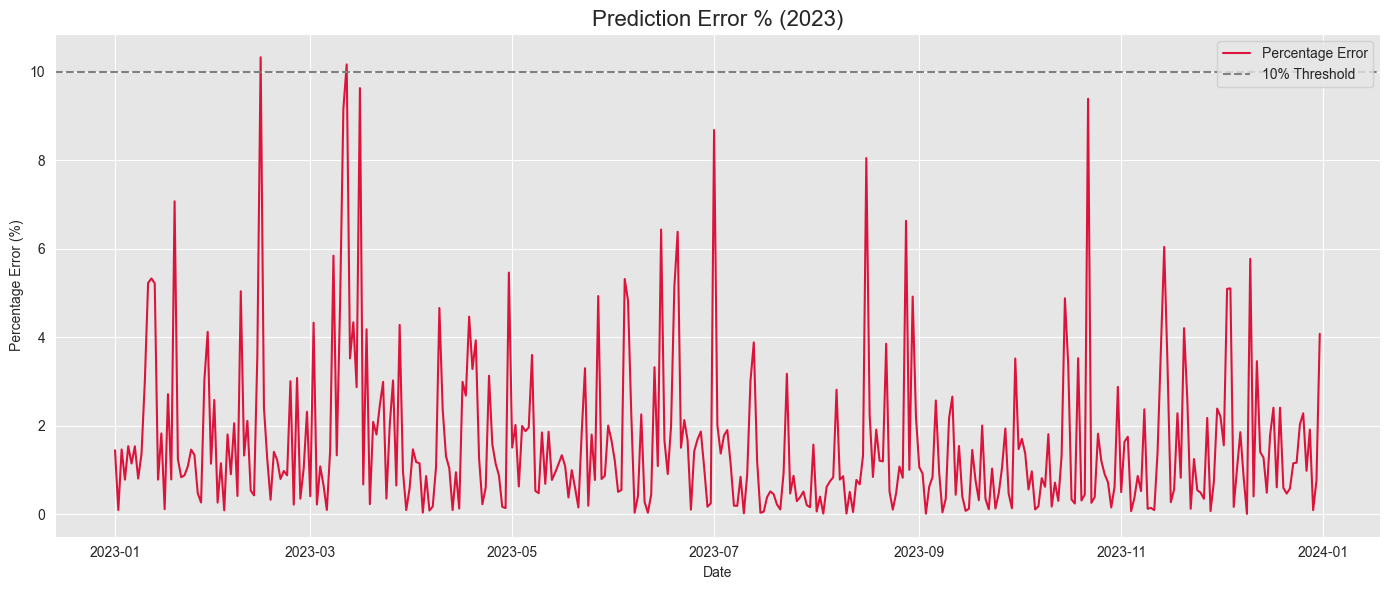

In [186]:
plt.figure(figsize=(14, 6))
plt.plot(df_test_pred.index, df_test_pred['perc_error'], label='Percentage Error', color='crimson')
plt.axhline(y=10, color='gray', linestyle='--', label='10% Threshold')
plt.title("Prediction Error % (2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Percentage Error (%)")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


### *Feature Importance:*

In [187]:
model = rf_model
feature_importances = model.feature_importances_
features = X_test.columns

In [188]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,open,0.19
6,ema,0.17
2,low,0.17
1,high,0.15
7,bbh,0.11
5,sma,0.09
8,bbm,0.08
9,bbl,0.04
4,returns,0.00
3,volume,0.00


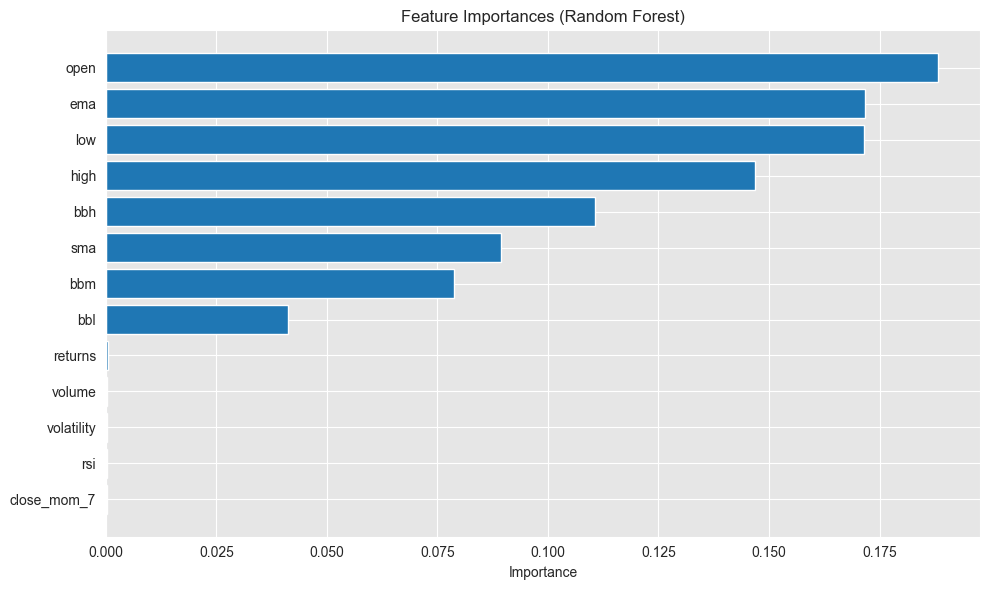

In [189]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [190]:
model = gbr_model

In [191]:
feature_importances = model.feature_importances_
features = X_test.columns

In [192]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,open,0.19
6,ema,0.17
2,low,0.17
1,high,0.15
7,bbh,0.11
5,sma,0.09
8,bbm,0.08
9,bbl,0.04
4,returns,0.00
3,volume,0.00


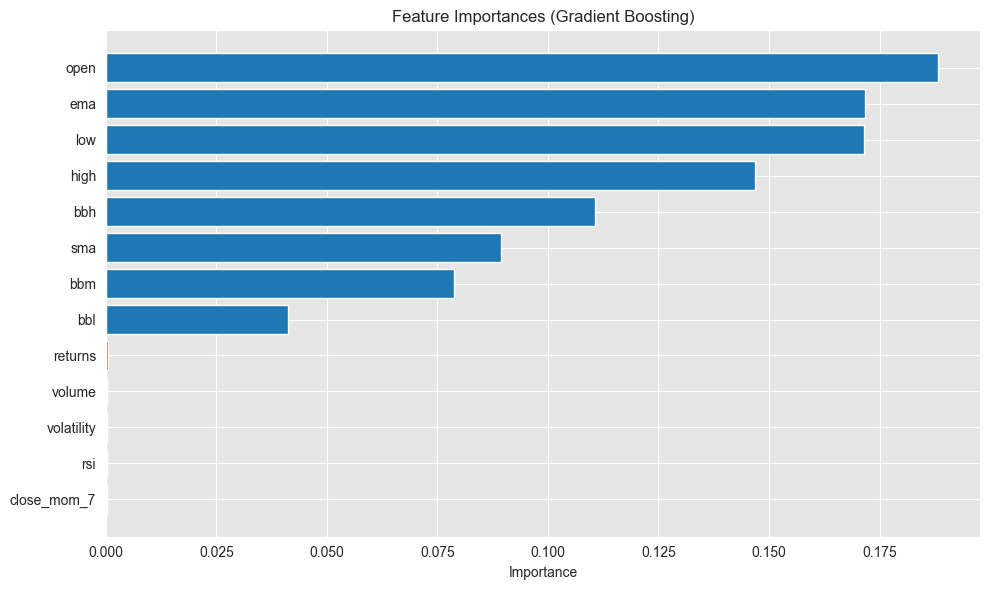

In [193]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### *Insights :*

* The model learned long-term trends effectively, showing strong generalization to unseen 2023 data.

* In the 2024 forecast, the closing price of Bitcoin reaches ~55,000 USDT in September and surges to nearly 100,000 USDT by December.

* Between September 2024 ($55,000) and December 2024 ($100,000), Bitcoin experienced an 81.8% increase in just 3 months, indicating a strong bullish trend.

* This December 2024 prediction marks an all-time high price.

* Between January 2023 and January 2025, Bitcoin’s predicted closing price grows from 18,000 USDT to nearly 100,000 USDT, representing a staggering 455.56% increase over two years — a potential 5.5x return.

* Feature importance analysis highlighted rolling averages, momentum, and volume activity as key predictors, aligning well with typical crypto price movement drivers.